In [1]:
import numpy as np
import matplotlib.pylab as plt

# 3. 신경망

앞 절에서 간단한 퍼셉트론으로 복잡한 것을 표현할 수 있음을 배웠지만, 
가중치 설정을 직접 사람이 해야 한다는 것이 좋지 않았다. 

신경망은 이것을 해결해 준다. 
가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력을 가지기 때문이다. 

이번 장에선 
- 신경망의 개요
- 신경망이 입력 데이터가 무엇인지 식별하는 처리과정 
을 살펴보자. 

자동으로 학습하는 것은 4장에서 볼 것이다. 

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예

<img src="http://cfile214.uf.daum.net/R400x0/126D78424FA8030705BAFC">

은닉층은 단순히 입력/출력 처럼 눈에 보이지 않으니 은닉층인 것이다. 
입력: 0층 ~ 출력: n층이 된다. 



### 3.1.2 퍼셉트론 복습

퍼셉트론 복습해보자. 
이전에는 편향이 보이지 않았는데, 이 또한 그래프에 나타낼 수 있다. (임계값 세타를 이항 했으므로)

<img src="https://t1.daumcdn.net/cfile/tistory/2428913E5928022127">

이 세 개의 신호가 뉴런에 입력되고, 각 신호에 가중치를 곱한 후 다음 뉴런에 전달된다. 
편향은 따로 가중치 없이 그 값 그대로 전달되니까 1*b = b이다. 

### 3.1.3 활성화 함수의 등장

활성화 함수 activation function란 위의 편향을 포함한 값을 구했을 때 0과 같거나 크면 1, 0보다 작으면 0을 결정해주는 함수이다. 
즉, h(b + w1*x1 + w2*x2) 이다. (결과값은 0 또는 1) 

일반적으로, 
- 단순 퍼셉트론은 단층 네트워크 + 계단 활성화 함수 모델이고, 
- 다층 퍼셉트론은 다층 네트워크 + 매끈한 활성화 함수 (시그노이드 같은) 를 쓰는 신경망 모델을 가리킴. 

## 3.2 활성화 함수 

이전까지는 임계값을 경계로 출력이 바뀌는 계단 함수 step function 을 썼는데, 신경망은 그렇지 않다. 

### 3.2.1 시그모이드 함수

신경망은 활성화 함수만 시그모이드이고 원리는 앞에서 본 퍼셉트론과 같다. 

### 3.2.2 계단 함수 구현하기. 

In [4]:
def step_function(x): # 하지만 이는 numpy 배열은 입력으로 못 받고 실수만 받을 수 있다. 
    if x > 0:
        return 1
    else:
        return 0    
    
def step_function(x):
    y = x > 0 # numpy 배열이 들어오면 원소 각각에 부등호 연산을 수행해 bool 배열을 출력한다. 그리고 astype으로 True => 1, False => 0으로 
    return y.astype(np.int)

### 3.2.3 계단 함수의 그래프

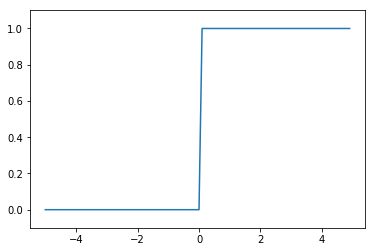

In [3]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1) # => np.array [-5.0, -4.9, ... , 4.9]
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y축 범위
plt.show()

### 3.2.4 시그모이드 함수 구현

In [7]:
def sigmoid(x):
    return 1/(1 + np.exp(-x)) # np의 broadcast를 통해 원소별로 연산됨. 

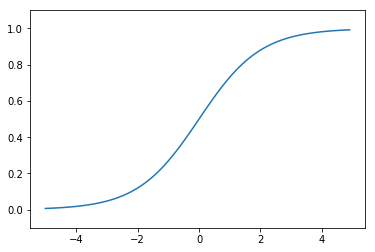

In [8]:
# x는 이미 정의함. 
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

앞의 step function과 비교해 시그모이드는 매끄럽다.
= 연속적인 실수 값을 반환한다. 
= 둘 다 0과 1 사이의 값을 가진다. 

### 3.2.6 비선형 함수

= 둘 모두 비선형 함수이다. 

선형 함수를 쓰면 안된다. 선형 함수를 쓰면 층을 깊게 하는 의미가 없어진다. (은닉층 없는 네트워크로도 같은 기능을 할 수 있음.)
1차 함수를 아무리 합성해봐야 계속 1차 함수가 나오기 때문. 

### 3.2.7 ReLU 함수

<img src="https://t1.daumcdn.net/cfile/tistory/2233513E59280D7923">

ReLU 함수 Rectififed Linear Unit 
0 미만으로 가면 전기를 정류(rectify) 하여 0으로 만드는 것에서 유래. 

In [9]:
def relu(x):
    return np.maximum(0,x)

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

In [10]:
A = np.array([[1,2,3], [4,5,6]])
A.shape

(2, 3)

In [11]:
B = np.array([[1,2], [3,4], [5,6]])
B.shape

(3, 2)

In [12]:
np.dot(A,B) # 행렬의 곱

array([[22, 28],
       [49, 64]])

### 3.3.3 신경망에서의 행렬 곱

신경망 연산을 matrix form으로 나타낼 수 있다. 

In [13]:
X = np.array([1,2])
W = np.array([[1,3,5], [2,4,6]])
Y = np.dot(X,W)
Y

array([ 5, 11, 17])

## <p style="color:purple">perceptron은 결국 논리회로(트랜지스터)이고, neural net은 XOR문제를 해결하기 위한 다층 논리회로이다. 그런데 여기서 weight의 갯수는 뭘로 정하는가? 왜 3개냐?<p>

## 3.4 3층 신경망 구현하기. 

### 3.4.1 표기법 설명

표기법보다 중요한 것은, 신경망 연산을 행렬 계산으로 나타낼 수 있따는 것. 
w(1)12 는 1층의 앞 층 2번 뉴런-->다음 층 1번 뉴런 의 가중치라는 뜻임. 
b(1)1 는 1층에서 앞 층의 편향뉴런이 다음 층의 1번째 뉴런으로 가는 것을 의미함. (편향은 하나니까)

### 3.4.2 각 층의 신호 전달 구현하기

이를 행렬로 표현하면 XW + B = A 로 나타낼 수 있음.
(X는 앞 층의 뉴런, B는 앞 층의 편향, W는 (뒷 층의 한 뉴런으로 가는)1층의 가중치, A는 뒷 층의 한 뉴런) 
여기서 B는 가중치를 곱하지 않고 (b1, b2, b3)의 형태를 띈다. (뉴런값이 1이니까.) 

In [17]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1 #행렬 곱 dot
A1

(2, 3)
(2,)
(3,)


array([0.3, 0.7, 1.1])

<img src="https://t1.daumcdn.net/cfile/tistory/9985BB375A692BC72D">
이제 여기서 얻어진 각각의 a를 h(x)라는 활성화 함수에 넣어보자.  

In [19]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [24]:
# 똑같이 2층도 할 수 있다. 
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(B2.shape)
print(W2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
Z2

(3,)
(2,)
(3, 2)


array([0.62624937, 0.7710107 ])

<img src="https://t1.daumcdn.net/cfile/tistory/99B12F345A6943F90E">
출력층의 구현. 앞과 같으나, 활성화 함수만 은닉층과 다르다.


In [29]:
def identity_function(x): # 시그마 함수. 
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y= identity_function(A3) # 혹은 Y = A3
Y

array([0.31682708, 0.69627909])

### 3.4.3 구현 정리

In [32]:
def init_network(): # 가중치와 편향(매개변수)을 초기화. 
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4 ,0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x): # 신호가 입력에서 출력 방향으로 가는 순전파(forward). <--> 역전파(backward)
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

## 3.5 출력층 설계하기. 

신경망은 분류와 회귀 모두에 이용 가능. 
둘 중 어떤 것이냐에 따라 출력층의 활성화 함수가 달라진다. 

- 회귀: 항등함수
- 2 클래스 분류: 시그모이드
- 다중 클래스 분류: 소프트맥스

## 3.5.1 항등 함수와 소프트맥스 함수 구현하기
<img src="https://t1.daumcdn.net/cfile/tistory/995AFB465A6AA10102"> 
소프트맥스 함수. 
식에서 볼 수 있듯, 분모는 모든 입력신호의 지수함수의 합 / 분자는 입력신호 ak의 지수함수이다. 
따라서 소프트맥스의 각 출력은 모든 입력 신호로부터 영향을 받는다. 


In [34]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a # 소프트맥스 함수. 다 더하면 100% 나옴. 
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [35]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점. 

컴퓨터로 계산할 때는 오버플로우가 생길 수 있다. (지수함수는 크니까.) 가령, e^1000 = inf 나옴. 
오버플로우를 주의해야 한다. 

또한 큰 값끼리 나눗셈을 하면 결과 수치가 '불안정'해질 수 있다. 

소프트맥스 함수의 특징은 입력값에 어떤 수치를 더하거나 빼 줘도 원래 식이 유지된다는 것이다. f(x-c) = f(x) 
이를 이용하여 x가 너무 클 경우를 대비해 입력신호 중 최대값을 c로 잡아 빼준다. 

<img src="https://t1.daumcdn.net/cfile/tistory/220C773B593E518207">

In [42]:
a = np.array([1.1, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # 오버플로우 됨. 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([ 0., nan, nan])

In [43]:
c = np.max(a)
print(a - c)

np.exp(a-c) / np.sum(np.exp(a-c)) # 잘 계산 됨.

[-998.9    0.   -10. ]


array([0.00000000e+00, 9.99954602e-01, 4.53978687e-05])

### 3.5.3 소프트맥스 함수의 특징

출력 총합이 1이다. (100%) 
따라서 이를 확률로 해석할 수 있다. 소프트맥스 함수는 문제를 확률적으로 해석할 수 있게 해준다. 

일반적으로 신경망 분류에서 가장 큰 출력이 내는 뉴런에 해당하는 클래스를 정답으로 인식한다. 

그런데 소프트맥스 함수 h(x)에 a를 넣어도 대소관계는 바뀌지 않는다. h(x)가 단조증가 함수이기 때문이다. 
따라서 출력층에 소프트맥스 함수를 생략해도 된다.  
현업에선 지수함수 계산에 소요되는 자원을 줄이기 위해 생략하는 것이 일반적이다. 

단, 이미 학습이 끝난 출력 단계에서만 그렇다는 말이다. 
학습할 때는 출력층에 소프트맥스 함수를 적용해줘야 한다. 

### 3.5.4 출력층의 뉴런 수 정하기. 

출력층의 뉴런 수는 풀려는 문제에 맞게 정해야 한다. 
분류에선 분류 클래스 수대로 하면 된다. 

## 3.6 손글씨 숫자 인식

이미 학습된 매개변수를 사용해 학습을 생략하고 추론 결과만 보겠다. (이 추론 과정을 순전파(forward propagation)라고 한다.)
원래는 학습을 통해 최적 매개변수를 찾아야 한다. 

### 3.6.1 MNIST 데이터셋

0~9의 손글씨 숫자. 


In [46]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False) 
# normalize: 픽셀 값을 0.0~1.0으로 정규화 여부 (False면 0~255 그대로 씀.)
# flatten: 입력 이미지를 1차원 배열로 만들지. (1*28*28 3차원 배열의 이미지 --> 1차원 배열)
# one_hot_label: 정답은 hot하게 1, 나머지는 0인 배열로 저장할 지 여부. 레이블이 숫자냐 0/1 이냐의 차이. 

# 각 데이터의 shape 출력.
print(x_train.shape) # training 이미지
print(t_train.shape) # test 레이블

print(x_test.shape) # test 이미지
print(t_test.shape) # test 레이블

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [49]:
# 이미지 구경 (숫자 5)

from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img)) # array에서 PIL용 데이터 객체로 변환. 
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape) # 여기선 1차원 배열
img = img.reshape(28, 28) # 다시 원래 이미지로 변환해야. 
print(img.shape)

img_show(img)


5
(784,)
(28, 28)


### 3.6.2 신경망의 추론 처리

- 입력층은 784개 (이미지 크기가 28*28 = 784니까.)
- 출력층은 10개 (0~9 니까)
- 은닉층은 총 2개. (50개, 100개) 그냥 임의로 정했음. 

In [55]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open('sample_weight.pkl', 'rb') as f: # 학습된 매개변수 읽어들임.
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y # 확률로 정확도 평가. 

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻음. 
    if p == t[i]:
        accuracy_cnt += 1

print('Accuracy:' + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


93% 정도 나왔다. 추후 99%까지 올릴 것이다. 

정규화로 특정 범위로 변환하는 처리를 하였고, (normalize)
더 넓은 개념으로 신경망의 입력 데이터에 특정 변환을 가하는 것을 전처리(pre-processing)라 한다. 

여기선 그냥 0~1로 정규화 하였지만, 현업에선 데이터 전체의 분포를 고려해 전처리하는 경우가 많다. 
그 외에도 전체 데이터를 균일하게 분포시키는 데이터 백색화(whitening)도 있다. 

### 3.6.3 배치(batch) 처리

앞에서 본 신경망은 각 층마다 입력-출력 전의출력-출력 전의출력-출력 ... 의 구조를 가진다. (행렬이니까 당연함.)
이는 한 개에 대해선 그런거고, 

만약 100개를 한다고 치면 맨 앞이 입력이 784가 아닌 batch의 갯수인 100이 들어갈 것이다. 
그러면 결과 Y도 100*10이 될 것이고, 이는 각 입력의 추론결과가 저장되는 것과 같다. 

즉, 한 개의 연산을 100번 하는 것 대신 100개를 배열에 포함시켜 한 번의 연산을 하는 것이다. 연산의 크기는 커지지만 그 편이 처리시간에 더욱 유리하다. 
(크게 한 번 > 작게 여러 번) 

이렇게 입력 데이터를 하나로 묶은 것을 batch(묶음)라고 한다.

배치 처리를 통해 이미지 한 장당 처리 시간을 대폭 줄일 수 있다. 
- 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리하도록 최적화 되어있음. 
- 큰 신경망에선 데이터 전송이 병목이 되는 경우가 있는데, 배치 처리를 통해 버스에 주는 부하를 줄일 수 있음. I/O를 통한 데이터 읽기가 줄어 CPU, GPU가 순수 계산 수행하는 비율이 높아짐. 
- 요약하자면 컴퓨터는 큰 배열을 한 번에 계산하는 것을 작은 배열을 여러 번 계산하는 것 보다 빨리 할 수 있다는 것임. 

배치 처리를 구현해보자.

In [60]:
#Anaconda ipykernal에선 overflow에러가 나네.. 

x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x+batch_size)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  del sys.path[0]


Accuracy:0.0


## 3.7 정리

신경망의 순전파를 살펴봤다. 
다음 층의 뉴런으로 신호를 전달하는 것은 퍼셉트론과 같지만, 활성화 함수에 큰 차이가 있었다. 
- 퍼셉트론: 계단함수
- 신경망: 매끄러운 시그모이드 
를 썼다. 


- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄러운 함수를 쓴다. 
- 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다. 
- 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다. 
- 출력층의 활설화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다. 
- 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다. 
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다. 
